In [2]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


ERROR: Ignored the following yanked versions: 1.11.0
ERROR: Ignored the following versions that require a different python version: 1.14.0 Requires-Python >=3.10; 1.14.0rc1 Requires-Python >=3.10; 1.14.0rc2 Requires-Python >=3.10; 1.14.1 Requires-Python >=3.10; 1.15.0 Requires-Python >=3.10; 1.15.0rc1 Requires-Python >=3.10; 1.15.0rc2 Requires-Python >=3.10; 1.15.1 Requires-Python >=3.10; 1.15.2 Requires-Python >=3.10; 2.1.0 Requires-Python >=3.10; 2.1.0rc1 Requires-Python >=3.10; 2.1.1 Requires-Python >=3.10; 2.1.2 Requires-Python >=3.10; 2.1.3 Requires-Python >=3.10; 2.2.0 Requires-Python >=3.10; 2.2.0rc1 Requires-Python >=3.10; 2.2.1 Requires-Python >=3.10; 2.2.2 Requires-Python >=3.10; 2.2.3 Requires-Python >=3.10; 3.10.0 Requires-Python >=3.10; 3.10.0rc1 Requires-Python >=3.10; 3.10.1 Requires-Python >=3.10
ERROR: Could not find a version that satisfies the requirement scipy==1.14.0 (from versions: 0.8.0, 0.9.0, 0.10.0, 0.10.1, 0.11.0, 0.12.0, 0.12.1, 0.13.0, 0.13.1, 0.13.2, 0.13.

In [6]:
pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ------------ --------------------------- 2.4/7.8 MB 14.9 MB/s eta 0:00:01
   ---------------------------- ----------- 5.5/7.8 MB 16.0 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 15.6 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 12.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 2.6/2.6 MB 21.5 MB/s eta 0:00:00
Using cached pyparsing-3.2.1-py3-none-any.whl (107 kB)
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install sklearn

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

In [11]:
pip install scikit-learn

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.2 MB ? eta -:--:--
    --------------------------------------- 0.3/11.2 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.2 MB 2.2 MB/s eta 0:00:05
   --- ------------------------------------ 1.0/11.2 MB 2.6 MB/s eta 0:00:04
   ------ --------------------------------- 1.8/11.2 MB 2.6 MB/s eta 0:00:04
   ----------- ---------------------------- 3.1/11.2 MB 3.3 MB/s eta 0:00:03
   --------------- ------------------------ 4.2/11.2 MB 3.9 MB/s eta 0:00:02
   ----------------- ---------------------- 5.0/11.2 MB 3.6 MB/s eta 0:00:02
   ------------------ --------------------- 5.2/11.2 MB 3.3 MB/s eta 0:00:02
   ---------------------- ----------------- 6.3/11.2 MB 3.5 MB/s eta 0:00:02
   --------------------------- ------------ 7.6/11.2 MB 3.8 MB/s eta 0:00:01
   ----------------------------- --

In [12]:
import numpy as np
import pandas as pd
import geopandas as gpd
import folium
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, LineString
from sklearn.cluster import KMeans
from scipy.spatial import Voronoi, ConvexHull
from sklearn.metrics import silhouette_score
from folium.plugins import HeatMap

In [14]:
df=pd.read_csv('Customer_data.csv')

In [15]:
df['order_count'] = df['order_count'] + 1  # Increment all values by 1
df['order_count'].fillna(1, inplace=True)  # Fill NaN values with 1

C:\Users\91735\AppData\Local\Temp\ipykernel_25520\1645056598.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['order_count'].fillna(1, inplace=True)  # Fill NaN values with 1


In [16]:
# Remove rows with missing latitude or longitude values
df = df.dropna(subset=['Delivery_location_latitude', 'Delivery_location_longitude'])

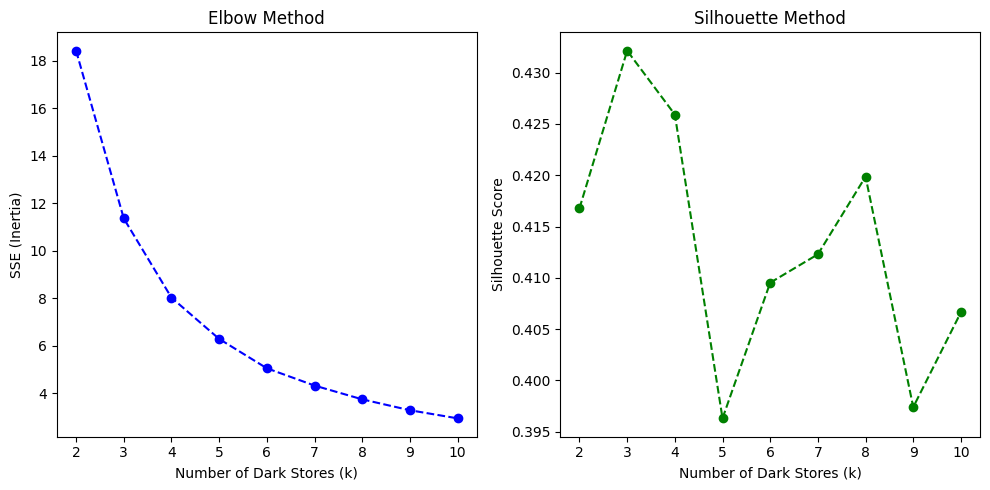

Optimal number of dark stores (k): 3


In [ ]:


# 1️⃣ Load Customer Demand Data
df=pd.read_csv("Customer_data.csv")
# 2️⃣ Preprocess Data
df['order_count'] = df['order_count'].fillna(0) + 1  # Fill NaN with 0, then add 1

# Drop rows with missing location data
df = df.dropna(subset=['Delivery_location_latitude', 'Delivery_location_longitude'])

# Extract customer locations & demand weights
customer_locations = df[['Delivery_location_latitude', 'Delivery_location_longitude']].values
customer_weights = df['order_count'].values  # Demand-based weighting

# 3️⃣ Determine Optimal k for Clustering
sse = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(customer_locations, sample_weight=customer_weights)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(customer_locations, labels))

# Plot Elbow & Silhouette Method
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(K_range, sse, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Dark Stores (k)')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method')

plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o', linestyle='--', color='g')
plt.xlabel('Number of Dark Stores (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')

plt.tight_layout()
plt.show()

# Select optimal k (Choose highest silhouette score OR elbow point)
optimal_k = K_range[np.argmax(silhouette_scores)]
print(f"Optimal number of dark stores (k): {optimal_k}")

# optimal_k = 17

# 4️⃣ Apply K-Means Clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(customer_locations, sample_weight=customer_weights)

# Get cluster centers (Suggested dark store locations)
dark_store_locations = kmeans.cluster_centers_

# 5️⃣ Compute Voronoi Diagram for store regions
vor = Voronoi(dark_store_locations)

# Function to get Voronoi regions as polygons
def voronoi_regions(vor):
    polygons = []
    for region in vor.regions:
        if not region or -1 in region:
            continue
        polygon = [vor.vertices[i] for i in region]
        polygons.append(Polygon(polygon))
    return polygons

voronoi_polygons = voronoi_regions(vor)
gdf_voronoi = gpd.GeoDataFrame(geometry=voronoi_polygons)

# 6️⃣ Create Pune Map
city_center = [df['Delivery_location_latitude'].mean(), df['Delivery_location_longitude'].mean()]
m = folium.Map(location=city_center, zoom_start=12)

# 7️⃣ Add Customer Density as Heatmap
heat_data = [[lat, lon, weight] for (lat, lon), weight in zip(customer_locations, customer_weights)]
HeatMap(heat_data, radius=12, blur=8, max_zoom=15).add_to(m)

# 8️⃣ Plot Voronoi Regions
for polygon in gdf_voronoi.geometry:
    geojson = gpd.GeoSeries([polygon]).__geo_interface__
    folium.GeoJson(geojson, style_function=lambda x: {'fillColor': 'lightblue', 'color': 'blue', 'weight': 1}).add_to(m)

# 9️⃣ Plot Dark Store Locations
for idx, loc in enumerate(dark_store_locations):
    folium.Marker(
        location=[loc[0], loc[1]],
        popup=f"Dark Store {idx+1}",
        icon=folium.Icon(color='red', icon='home')
    ).add_to(m)

# 🔟 Draw Cluster Boundaries with Dashed Lines
for cluster in range(optimal_k):
    cluster_points = df[df['cluster'] == cluster][['Delivery_location_latitude', 'Delivery_location_longitude']].values
    if len(cluster_points) > 2:
        hull = ConvexHull(cluster_points)
        hull_points = [cluster_points[i] for i in hull.vertices] + [cluster_points[hull.vertices[0]]]
        hull_line = LineString(hull_points)
        folium.PolyLine(
            locations=[(p[0], p[1]) for p in hull_line.coords],
            color='black', dash_array='5,5', weight=2
        ).add_to(m)

# Display the Map
m